# Epidemics

## Exercise 2: absorbing probabilities in SIR dynamics on ring graph

In SIR dynamics there are multiple absorbing states (every disease-free state is absorbing). Eventually, the Markov process will reach a disease-free state with probability 1. Instead of computing the absorbing time for a disease-free state, we here ask for every $k \le n$ what is the probability that the Markov process is absorbed in a state with $n-k$ susceptible agents and $k$ recovered agents. This indicates how large the outbreak was.

Let us work with a ring graph, and assume that only one node is infected at the initial time.

Observe that all the nodes that get infected (i.e., are either infected or recovered) belong to a connected set. Therefore, the boundary between infected and recovered nodes is at most 2. 

We identify the states of the process by two scalar indicators, $I$ and $B$:
- $I$ now denotes the total number of agents that have been infected from the beginning of the process;
- $B$ is number of links between susceptibles and infected agents. Every state is identified through a pair $(I,B)$. 

Since we are not asking the hitting times, but only the absorbing probabilities we can work with the corresponding jump process where the time $t \in \{0,1,2,...\}$ is discrete.

Note that because of the topology of the graph, there are only two types of transitions:

$$
\begin{cases}
I(t+1) = I(t) + 1 \\
B(t+1) = B(t)
\end{cases}
\quad \quad \quad
\begin{cases}
I(t+1) = I(t) \\
B(t+1) = B(t)-1
\end{cases}
$$

The continuous-time Markov process in the space $(I,B)$ is

![figure](continuous_ring-1.png)

where the red nodes are the only absorbing states.

Since we are interested only in the absorbing probabilities, we can construct the associated jump chain.

**Remark**: there is a slight abuse of notation in the graph, because if all the nodes have been infected, the boundary $B$ must be 0. Here, (N,2) indicates that none of the nodes on the boundary recover before infecting the adjacent node.

![figure](discrete_ring-1.png)

Let $p_i$ denote the probability that the outbreak size is $i$. It is straighforward to notice that

$$
p_1 = \frac{1}{2\beta+1}.
$$

For $n>i>1$, it is necessary that the first node infects a second node (probability $2\beta/(2\beta+1)$). For a given $i$, there are multiple paths (specifically, $i-1$ paths) from configuration $(2,2)$ to $(i,0)$, each of them with probability

$$
\left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2.
$$

Thus, 

$$
p_i = \frac{2\beta}{2\beta+1} \cdot (i-1) \cdot \left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2.
$$

For $p_n$ there are $n-2$ paths with probability $\left(\frac{\beta}{\beta+1}\right)^{n-2} \left(\frac{1}{\beta+1}\right)$ and $1$ path with probability $\left(\frac{\beta}{\beta+1}\right)^{n-2}$.

Putting all together,

$$
\begin{cases}
p_1 = \frac{1}{2\beta+1} \\
p_i = \frac{2\beta}{2\beta+1} \cdot (i-1) \cdot \left(\frac{\beta}{\beta+1}\right)^{i-2} \left(\frac{1}{\beta+1}\right)^2 \quad 1<i<n \\
p_n = \frac{2\beta}{2\beta+1} \cdot \left((n-2) \left(\frac{\beta}{\beta+1}\right)^{n-2} \left(\frac{1}{\beta+1}\right) + \left(\frac{\beta}{\beta+1}\right)^{n-2} \right)
\end{cases}
$$

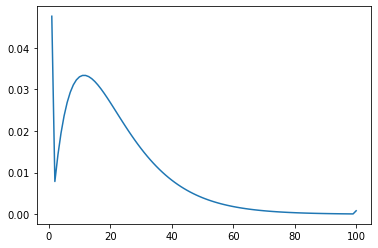

In [1]:
# PLOT THE RESULT

# X: number of infected nodes
# Y: probability

import numpy as np
import matplotlib.pyplot as plt

n = 100
beta = 10

p = np.zeros(n+1)

p[0] = 0
p[1] = 1/(2*beta+1)

for i in range(2,n):
    p[i] = (i-1)*(2*beta)/(2*beta+1)*(beta/(beta+1))**(i-2)/(beta+1)**2
    
p[n] = (2*beta)/(2*beta+1) * ((n-2)*(beta/(beta+1))**(n-2)/(beta+1)+(beta/(beta+1))**(n-2))

x = range(n+1)

plt.plot(x[1:n+1],p[1:n+1])
plt.show()

**Limits**:
- $\beta \to 0^+$: $p_1 \to 1$;
- $\beta \to +\infty$: $p_n \to 1$.

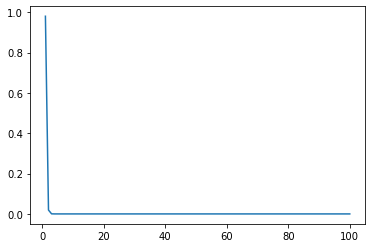

In [2]:
n = 100
beta = 0.01

p = np.zeros(n+1)

p[0] = 0
p[1] = 1/(2*beta+1)

for i in range(2,n):
    p[i] = (i-1)*(2*beta)/(2*beta+1)*(beta/(beta+1))**(i-2)/(beta+1)**2
    
p[n] = (2*beta)/(2*beta+1) * ((n-2)*(beta/(beta+1))**(n-2)/(beta+1)+(beta/(beta+1))**(n-2))

x = range(n+1)

plt.plot(x[1:n+1],p[1:n+1])
plt.show()

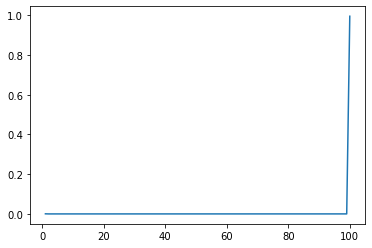

In [3]:
n = 100
beta = 1000

p = np.zeros(n+1)

p[0] = 0
p[1] = 1/(2*beta+1)

for i in range(2,n):
    p[i] = (i-1)*(2*beta)/(2*beta+1)*(beta/(beta+1))**(i-2)/(beta+1)**2
    
p[n] = (2*beta)/(2*beta+1) * ((n-2)*(beta/(beta+1))**(n-2)/(beta+1)+(beta/(beta+1))**(n-2))

x = range(n+1)

plt.plot(x[1:n+1],p[1:n+1])
plt.show()

# Game theory

### Theory Recap

A **game** in strategic form is a triplet $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$ where:
- $\mathcal V$ is the finite set of **players**
- $\mathcal A$ is the set of **actions** available to each player. Actions $x_i \in \mathcal A$ chosen  by each player are collected in a vector $x = (x_1,x_2, \ldots, x_n)$ called **configuration** of the game. We denote the set of all configurations by $\mathcal X = \mathcal A^{\mathcal V}$.
- for each player $i \in \mathcal V$, the utility function $u_i: \mathcal X \rightarrow \mathbb{R}$ describes the **payoff** the player gets in each configuration: the utility of a player depends on its own action but also on the actions of other players.	

To each player $i \in \mathcal V$ we associate a **best response** function, which gives, for each configuration of the other players, the best action for $i$ (i.e., the actions that maximize its utility)
$$
\mathcal B_i(x_{-i})= \arg\max_{x_i \in \mathcal A} u_i(x_i,x_{-i})
$$

A **Nash equilibrium** is a configuration $x^* \in \mathcal X$ such that
$$
x_i^* \in \mathcal B_i (x^*_{-i}), \quad i \in \mathcal V
$$

A game is **potential** if there exists a potential function $\Phi: \mathcal X \rightarrow \mathbb{R}$ which describes the way the utility function of each player changes when that player unilaterally varies its action. That is, $\forall i \in \mathcal V$, $\forall x,y \in \mathcal X$
$$
x_{-i}=y_{-i} \implies u_i(y)-u_i(x) = \Phi(y)-\Phi(x)
$$

# Discrete time best response dynamics
In this section we present and analyze a first game-theoretic learning process, the discrete time best response dynamics.

Consider a game $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$. 

The **discrete-time asynchronous best response dynamics** is a Markov chain $X(t)$ with state space $\mathcal X= \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game.
At time instant $t$, when the chain is in $X(t)$, one player $i$ is selected uniformly at random in $\mathcal V$ and she changes her action to a best response chosen uniformly at random in the set $B_i(X(t)_{-i})$.

In other words, the best response dynamics is random walk on the transition graph $\mathcal G_{B}$, i.e., the graph with nodes corresponding to configurations $\mathcal X=\mathcal A^{\mathcal V}$ and links $(x,y)$ from configurations $x$ and $y$ that differ in exactly one entry $i$ if and only if $y_i \in B_i(x_{-i})$.

## Example: Rock-Scissor-Paper game
The Rock-Scissor-Paper game is a two-player symmetric game with action set $\mathcal A =\{R, S, P\}$ and utility matrix

![utility-matrix](RSP-utility.png)

1. Write a function that implements the best response correspondence for both players.
2. Does the game admit Nash equilibria?
3. Is the game potential?
4. Consider the best response dynamics for the RSP game. Plot the transition graph $\mathcal G_{B}$.
5. Simulate the (discrete time) best response dynamics and estimate the invariant probability distribution $\pi$.
6. Compute and plot the condensation graph of $\mathcal G_{B}$.
7. Compute analytically the invariant distribution $\pi$ of the best response dynamics.


> 1. Write a function that implements the best response for both players.

In [4]:
# Define action vector
# we identify actions with numbers: R->0, S->1, P->2
actions = np.array([0,1,2])

# Define utility matrix
# first index is the player whose utility is being computed 0=first/row player,
# 1=second/column player,
# second index is the first player action 0=R, 1=S, 2=P,
# third index is the second player action 0=R, 1=S, 2=P
utility = np.array([[[0, 1, -1],
                     [-1, 0, 1],
                     [1, -1, 0]],
                    [[0, -1, 1],
                     [1, 0, -1],
                     [-1, 1, 0]]
                   ])

print(utility)


# Best response function for 2 player games 
def best_response(player, configuration):
    # if player == 1, other_player = 0 (and viceversa)
    other_player = 1-player
    other_action = configuration[other_player]
    if player == 0:
        # if player == 0, player 0 looks at the action of player 1 (other_action) and chooses BR (2nd index)
        return [np.argmax(utility[player, :, other_action])]
    if player == 1:
        # if player == 1, player 1 looks at the action of player 0 (other_action) and chooses BR (3nd index)
        return [np.argmax(utility[player, other_action, :])]

[[[ 0  1 -1]
  [-1  0  1]
  [ 1 -1  0]]

 [[ 0 -1  1]
  [ 1  0 -1]
  [-1  1  0]]]


> 2. Does the game admit Nash equilibria?

In [5]:
from itertools import product

# Compute all game's configurations
# product function computes the cartesian product of actions with itself
# returns an iterator of tuples of actions
configurations = list(product(actions, repeat=2))
print("Configurations:", configurations, "\n")

nash_list = []

# we cycle over configurations:
# each configuration is a Nash unless there exists (at least) one player who
# is not playing a best response to the configuration of other players
for configuration in configurations:
    is_nash = True
    for player in [0,1]:
        if configuration[player] not in best_response(player,configuration):
            is_nash = False
            break
    if is_nash:
        nash_list.append(configuration)
        
if len(nash_list) != 0:
    print("The game admits the following Nash equilibria", nash_list)
else:
    print("The game does not posses Nash equilibria.")

Configurations: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)] 

The game does not posses Nash equilibria.


The game does not posses any Nash equilibrium. In each configuration at least one player has an incentive in changing is current action to a best response, which gives him utility $+1$. There are no configurations where both players have utility $+1$.

> 3. Is the game potential?

If a finite game (i.e., a  game with a finite configuration set) is potential, then the set of its Nash equilibria is non-empty as it contains the maxima of the potential function $\Phi$.
The RSP game does not posses Nash equilibria, so it is not potential (otherwise Weierstrass' theorem would be violated).

> 4. Consider the best response dynamics for the RSP game. Plot the transition graph $\mathcal G_{B}$ (i.e., the graph with nodes corresponding to configurations $\mathcal X=\mathcal A^{\mathcal V}$ and links $(x,y)$ between configurations $x$ and $y$ that differ in exactly one entry $i$ if and only if $y_i \in B_i(x_{-i})$).

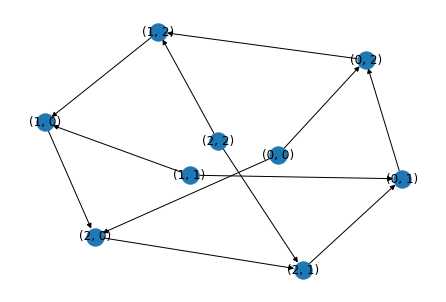

In [6]:
import networkx as nx

# transition_graph is a directed graph
transition_graph = nx.DiGraph()
# nodes of transition_graph are configurations
transition_graph.add_nodes_from(configurations)

# we visit each configuration x and add links to neighboring configurations.
# Neighboring configurations y of x are those that differ in exactly one entry,
# the action of a single player i, and such that y_i is a best response to
# x_i for player i
for configuration in configurations:
    for player in [0,1]:
        for other_action in actions:
            # selects other action in best response, but no selfloops
            if other_action != configuration[player] and other_action in best_response(player,configuration):
                other_config = list(configuration)
                other_config[player] = other_action
                other_config = tuple(other_config)
                transition_graph.add_edge(configuration,other_config)
                
pos = nx.spring_layout(transition_graph)
nx.draw(transition_graph, pos=pos, with_labels=True)       

The transition graph has nodes corresponding to the $9$ game configurations and directed links which represent admissible transitions for the best response dynamics. 

> 5. Simulate the (discrete time) best response dynamics and estimate the invariant probability distribution $\pi$.

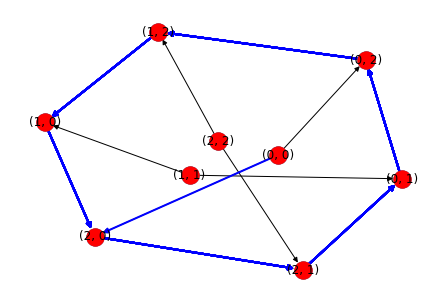

In [7]:
from numpy.random import choice, rand 

# Simulates the best response dynamics as a random walk on the transition graph G
# starting from node xi.
# if till_first_return = True the random walk stops the first time
# it returns to the starting node xi.
# Otherwise, it goes on for num_steps steps.

def RandomWalk(G, xi, num_steps, till_first_return = False):
    # nodeSeq stores the sequence of visited nodes
    nodeSeq = []
    nodeSeq.append(xi)
    
    # if the walk ends at the first return to xi
    if till_first_return:
        # stores the initial position to check if the 
        # walk returns to it
        x_init = xi
        
        while True:
            # compute the next visited node xi by chosing uniformly
            # at random a neighbor of the current one
            neighbors = list(G.neighbors(xi))
            index = choice(len(neighbors),1)[0] 
            xi = neighbors[index] 
            nodeSeq.append(xi)
            
            # check if the walk has returned to the starting node
            # if so, end the walk
            if xi == x_init:
                return nodeSeq
    
    # if the walk ends after num_steps steps
    else:
        for i in range(num_steps):
            neighbors = list(G.neighbors(xi))
            index = choice(len(neighbors),1)[0] 
            xi = neighbors[index]
            nodeSeq.append(xi)
        return nodeSeq

# Simulate the BR dynamics 
nodeSeq = RandomWalk(transition_graph, xi=(0,0), num_steps=100, till_first_return=False)
edgeSeq = [(nodeSeq[i-1], nodeSeq[i]) for i in range(1,len(nodeSeq))]

# Draw G and represent the random walk by colouring the edge sequence
# first draw all nodes and links
nx.draw(transition_graph, pos)
# then, on the previous picture, add node labels and highlight the edge sequence
nx.draw(transition_graph, pos, with_labels=True, edgelist = edgeSeq, edge_color='blue', node_color='red', width=2)

We see that the dynamics starts at configuration (R,R) (represented by (0,0)) and after one step it exit from it. Then it continue cycling over best response cycle $(0,2) \to (1,2) \to (1,0) \to (2,0) \to (2,1) \to (0,1) \to (0,2)$. In particular, it never goes back to $(0,0)$ and $(1,1),(2,2)$ are never visited.

In [8]:
# Esitimate the invariant measure pi of the BR dynamics by 
# simulating a "long" random walk

nodeSeq = RandomWalk(transition_graph, (0,0), 1000, False)

# Compute empirical frequencies

# Define a dictionary to store frequencies of visit to each node and initialize each frequency to 0
frequencies = {node:0 for node in transition_graph.nodes}
# count the visits to each node
for node in nodeSeq:
    frequencies[node] += 1
# transform dict values to a np.array
frequencies = list(frequencies[node] for node in transition_graph.nodes) 
frequencies = np.array(frequencies, dtype="double")
# normalize the counts to obtain frequencies
frequencies /= len(nodeSeq)
print("Frequencies:", frequencies, "\n")

# Print the indices of nodes where pi is positive
print("The approximate invariant distribution is supported on nodes:")
for index,node in enumerate(transition_graph.nodes):
    if frequencies[index]>0:
        print(node)

Frequencies: [0.000999   0.16683317 0.16683317 0.16583417 0.         0.16583417
 0.16683317 0.16683317 0.        ] 

The approximate invariant distribution is supported on nodes:
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 2)
(2, 0)
(2, 1)


The approximate invariant distribution appears to be supported on nodes $\{(0,0),(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)\}$ of the transition graph. However, the measure of node $(0,0)$ is negligible with respect to that of $(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)$, which are almost equal to each other. Actually, the little weight associated to node $(0,0)$ appears to depend on the fact that it has been visited once since it is the starting point of the chain. We guess that when the length on the walk tends to infinity the weight associated to node $(0,0)$ vanishes and the approximation of $\pi$ is supported and uniformly distributed on $\{(0,1),(0,2),(1,0),(1,2),(2,0),(2,1)\}$.

> 6. Compute and plot the condensation graph of $\mathcal G_{B}$.

{0: {'members': {(0, 1), (1, 2), (2, 1), (2, 0), (0, 2), (1, 0)}}, 1: {'members': {(0, 0)}}, 2: {'members': {(1, 1)}}, 3: {'members': {(2, 2)}}}


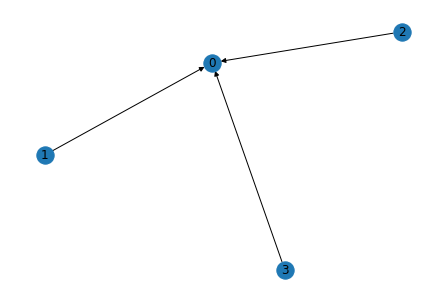

In [9]:
CG = nx.algorithms.components.condensation(transition_graph)
nx.draw(CG, with_labels=True)
print(dict(CG.nodes))

The condensation graph is shown above, where the hypernode $0$ contains all configurations except for $(R,R), (S,S), (P,P)$ (the ones that correspond to a draw). More precisely, the hypernode $0$ contains the $6$-cycle $(0,2) \to (1,2) \to (1,0) \to (2,0) \to (2,1) \to (0,1) \to (0,2)$. The hypernodes $1,2,3$ instead contain the singletons $(R,R), (S,S), (P,P)$. The condensation graph contains only one sink, that is $s_{\text{transition_graph}} = 1$.

7. Compute analytically the invariant distribution $\pi$ of the best response dynamics.

We know that the invariant probability distribution is supported on the nodes contained in the unique sink of the condensation graph. The subgraph corresponding to such sink is balanced (all nodes have in-degree $1$ and out-degree $1$, so the sink is $1$-regular), then the extremal invariant probability distribution supported on that sink is obtained by normalizing the out-degree vector. In this way we find that $\pi_x = 1/6$, for $x \in \{RS, RP, SR, SP, PR, PS\}$ and $\pi_x = 0$ for $x \in \{RR, SS, PP\}$.

We can check that this is correct with the following code.

In [10]:
# Compute P matrix
A = nx.adjacency_matrix(transition_graph) # -> return type is scipy.sparse.csr_matrix
A = A.toarray() # convert A to a numpy array
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A

# Compute invariant distribution
values,vectors = np.linalg.eig(P.T)
index = np.argmax(values.real)
pi = vectors[:,index].real
pi = pi/np.sum(pi)
print("pi=", pi)

pi= [-0.          0.16666667  0.16666667  0.16666667 -0.          0.16666667
  0.16666667  0.16666667 -0.        ]


# Continuous time best response dynamics
In this section we present the continuous time best response dynamics, which is the continuous time analog of the process presented in the previous section.


Consider a game $\left(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V}\right)$. 

The **continuous-time asynchronous best response dynamics** is a continuous time Markov chain $X(t)$ with state space $\mathcal X= \mathcal A^{\mathcal V}$ coinciding with the configuration space of the game and transition rate matrix $\Lambda$ as follows: 

$\Lambda_{xy} = 0$ for every two configurations $x, y \in \mathcal X$ that differ in more
than one entry, and

$$
\Lambda_{xy} = \begin{cases}
|B_i(x_{-i})|^{-1} \quad &\text{if} \quad y_i \in B_i(x_{-i}) \\
0 \quad &\text{if} \quad y_i \notin B_i(x_{-i})
\end{cases}
$$

for every two configurations $x, y \in \mathcal X$ differing in entry $i$ only, i.e., such that
$x_i \neq y_i$ and $x_{-i} = y_{-i}$.

**Proposition**: consider a potential game, and let $\mathcal{N}$ the set of the Nash equilibria. Then, the best response dynamics $X(t)$ is such that, for every distribution of the initial configuration $X(0)$, the best response dynamics converges to $\mathcal{N}$ in finite time with probability 1. 

**Remark**: Convergence is insured to a particular subset of NE, that is the one consisting of the nodes of all the sink connected components of the underlying transition graph of the Markov process. In the sequel we denote such subset as $\mathcal{N}_\infty$: it is a trapping set and actually the largest trapping set inside $\mathcal{N}$. We call $\mathcal{N}_\infty$ the set of recurrent Nash equilibria. Notice that in those special cases when $\mathcal{N}_\infty$ coincides with $\text{argmax}(\mathcal{X})$, we actually have that the BR dynamics converges to the subset of Nash equilibria consisting of the maxima of the potential.

## Continuous time BRD for network games

Network games are games where players are associated to nodes of a graph $\mathcal G$ that describes the interactions among them. In particular, for each player $i\in\mathcal V$ and for each couple of configurations $x,y\in\mathcal A^{\mathcal V}$ such that $x_j=y_j$ for each $j\in\ N_i\cup\{i\}$ it holds that

$$u_i(x)=u_i(y)$$

This means that the utility of each player only depends on the actions of its neighbors in the graph $\mathcal G$.


Given an unweighted undirected graph $\mathcal G=(\mathcal V,\mathcal E,W)$ we can construct a network game on it by setting the players’ utilities to coincide with the weighted sum of the payoffs of the same symmetric two-player game played by the player simultaneously with her neighbors.

Specifically, for a symmetric two-player game with action set $\mathcal A$ and utility function $\varphi(x_1, x_2)$ we define the network game $(\mathcal V, \mathcal A, \{u_i\}_{i \in \mathcal V} )$ by setting the utility of every player $i \in \mathcal V$ as
$$
u_i(x) = \sum_{j \in \mathcal V} W_{ij}\varphi(x_i,x_j)
$$

A binary coordination game is a symmetric $2 \times 2$-game with action set $\mathcal A = \{0,1\}$ with payoff matrix $\varphi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a,a | d,c |
| **1** | c,d | b,b |

where $a > c$ and $b > d$. The inequalities above imply that the best response for each player is to copy the action of the other player.

It is a potential game with potential $\phi$

|   | 0   | 1   |
|---|-----|-----|
| **0** | a-c | 0 |
| **1** | 0 | b-d |

Consider the **network coordination game**, obtained combining binary coordination games on a complete graph.

Recall that such network game is potential with potential function $\Phi$

$$
\Phi(x) = \frac{1}{2} \sum_{i,j} W_{ij} \phi(x_i,x_j) .
$$

1. Simulate the dynamics when the coordination game has the same utility value for coordination of action 0 and action 1 respectively, i.e., $a=b=1$ and $c=d=0$ (this is called **majority game**). Run the simulation a few times and plot the potential function as a function of time. What do you observe?

**Hint**: you need to fix the best response function to deal with more than 2 players. To do this it is useful to define a Python function to represent the utility functions of the network game.

In [11]:
# TO DO

In the next lecture we will analyze best response and noisy best response dynamics in potential games emphasizing the differences between the two.

**An overview on learning dynamics**: note that other types of dynamics exist beyond payoff-based dynamics, e.g., imitative dynamics, in which agents agent copy the action of some other nodes and switch to that strategy with a probability that depends on the payoff of that action.